In [1]:
import pandas as pd
import numpy as np

In [2]:
fashion_train_df = pd.read_csv('./data/fashion-mnist_train.csv')
fashion_test_df = pd.read_csv('./data/fashion-mnist_test.csv')

In [3]:
fashion_train_df.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


In [4]:
fashion_train_df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [5]:
print(set(fashion_train_df['label']))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [6]:
print([fashion_train_df.drop(labels='label', axis=1).min(axis=1).min(), 
      fashion_train_df.drop(labels='label', axis=1).max(axis=1).max()])

[0, 255]


In [7]:
fashion_train_df.shape

(60000, 785)

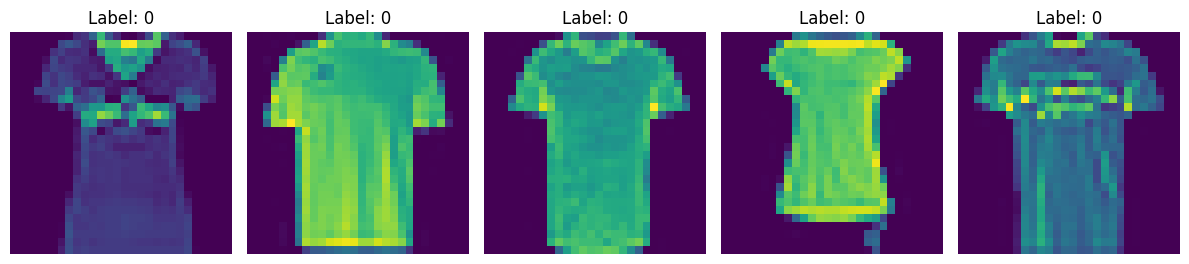

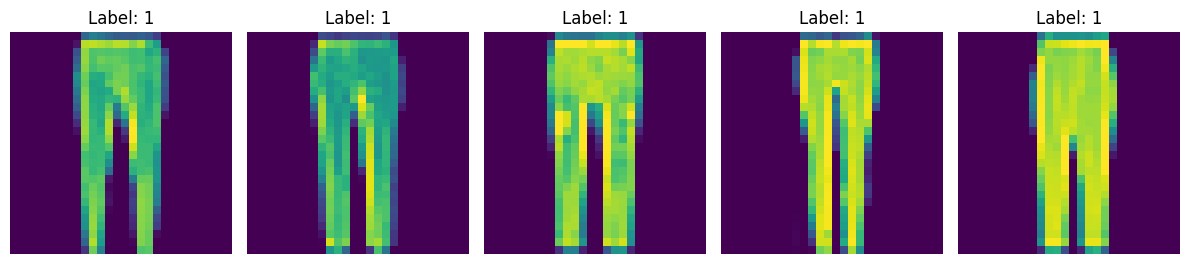

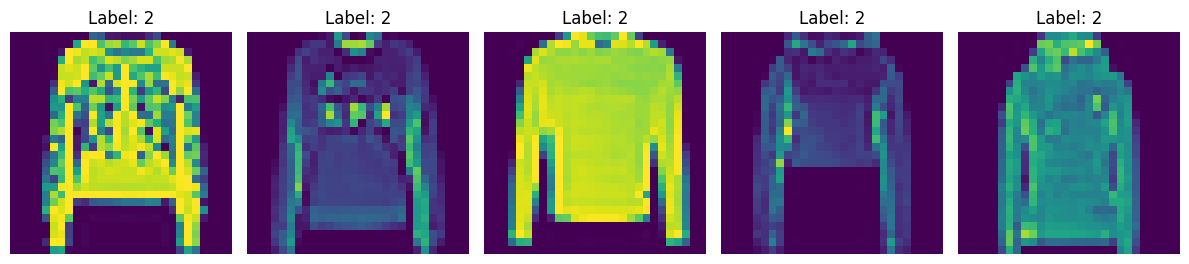

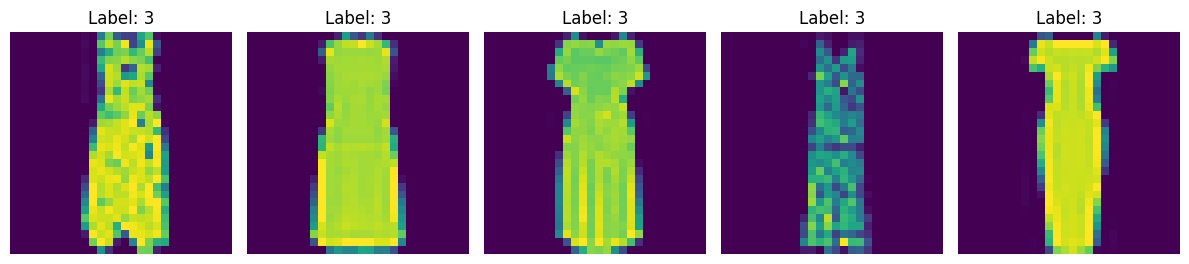

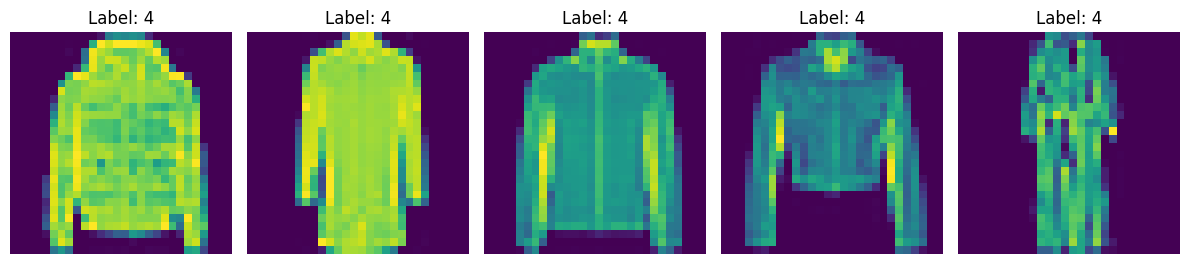

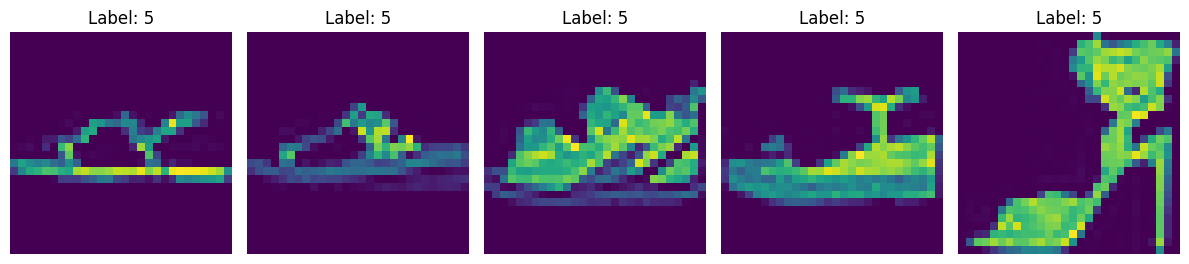

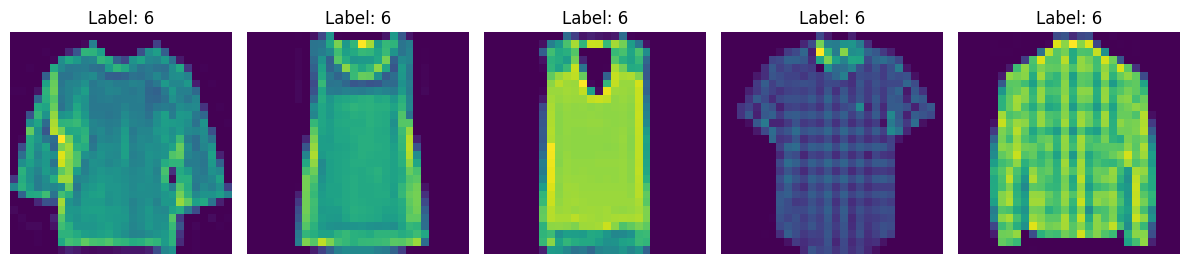

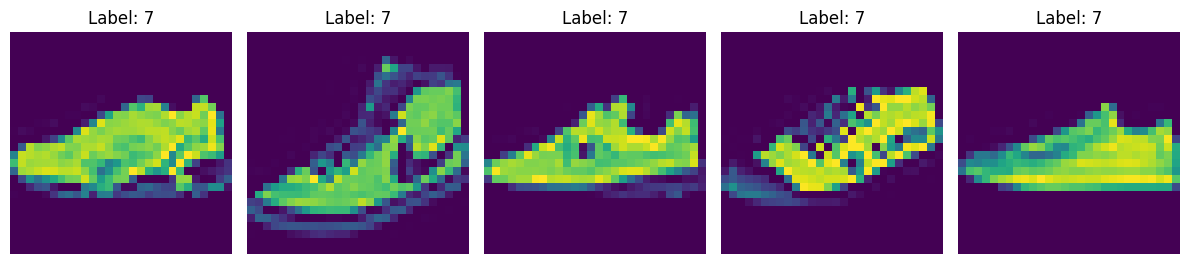

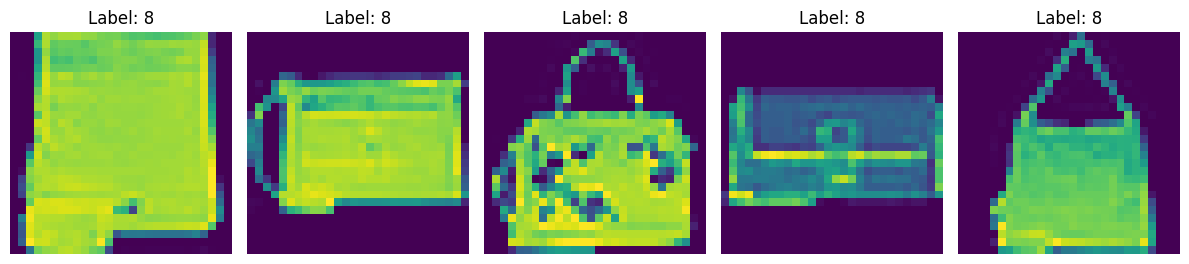

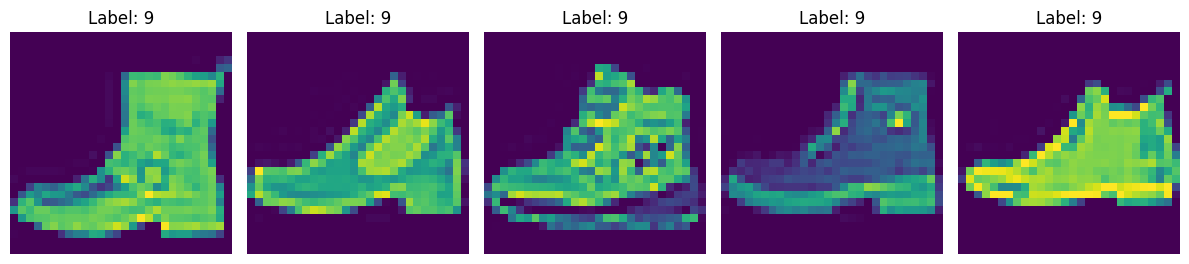

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Iterate through labels 0 to 9
for label_to_print in range(10):
    # Filter the training dataset for images with the specified label
    images_with_label = fashion_train_df[fashion_train_df['label'] == label_to_print].drop(columns='label').values

    # Get the number of images with the specified label
    num_images = len(images_with_label)

    # Show 5 random images with the specified label
    num_images_to_show = min(5, num_images)
    fig, axes = plt.subplots(1, num_images_to_show, figsize=(12, 4))

    for i in range(num_images_to_show):
        index = np.random.randint(0, num_images)
        axes[i].imshow(images_with_label[index].reshape(28, 28))
        axes[i].set_title(f"Label: {label_to_print}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


In [9]:
# convert to numpy arrays and reshape
training = np.asarray(fashion_train_df, dtype='float32')

X_train = training[:, 1:].reshape([-1,28,28,1])
X_train = X_train/255   # Normalizing the data
y_train = training[:, 0]

testing = np.asarray(fashion_test_df, dtype='float32')
X_test = testing[:, 1:].reshape([-1,28,28,1])
X_test = X_test/255    # Normalizing the data
y_test = testing[:, 0]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=5) 

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout

# Initialize the model
cnn_model = Sequential()

# Add Convolutional layers
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Add Dropout for regularization
cnn_model.add(Dropout(rate=0.5))

# Flatten the feature maps to a 1D vector
cnn_model.add(Flatten())

# Add Dense layers
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dense(units=64, activation='relu'))

# Output layer
cnn_model.add(Dense(units=10, activation='softmax'))

2024-04-29 00:22:22.118172: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-29 00:22:22.118219: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-29 00:22:22.118916: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-29 00:22:22.123114: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 00:22:22.766451: W tensorflow/compiler/tf2

In [12]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [14]:
cnn_model.fit(x=X_train, y=y_train, batch_size=512, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
94/94 [==============================] - 11s 108ms/step - loss: 0.9032 - accuracy: 0.6812 - val_loss: 0.5338 - val_accuracy: 0.8010
Epoch 2/10
94/94 [==============================] - 10s 105ms/step - loss: 0.5005 - accuracy: 0.8150 - val_loss: 0.4311 - val_accuracy: 0.8468
Epoch 3/10
94/94 [==============================] - 9s 100ms/step - loss: 0.4345 - accuracy: 0.8408 - val_loss: 0.3845 - val_accuracy: 0.8634
Epoch 4/10
94/94 [==============================] - 10s 101ms/step - loss: 0.3928 - accuracy: 0.8573 - val_loss: 0.3507 - val_accuracy: 0.8740
Epoch 5/10
94/94 [==============================] - 10s 102ms/step - loss: 0.3701 - accuracy: 0.8647 - val_loss: 0.3362 - val_accuracy: 0.8781
Epoch 6/10
94/94 [==============================] - 10s 102ms/step - loss: 0.3501 - accuracy: 0.8721 - val_loss: 0.3174 - val_accuracy: 0.8865
Epoch 7/10
94/94 [==============================] - 10s 102ms/step - loss: 0.3359 - accuracy: 0.8779 - val_loss: 0.3054 - val_accuracy: 0.8908


In [15]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 1s 4ms/step - loss: 0.2689 - accuracy: 0.9017
Test Loss: 0.26894721388816833
Test Accuracy: 0.9017000198364258


In [16]:
predict_x=cnn_model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 1s 3ms/step


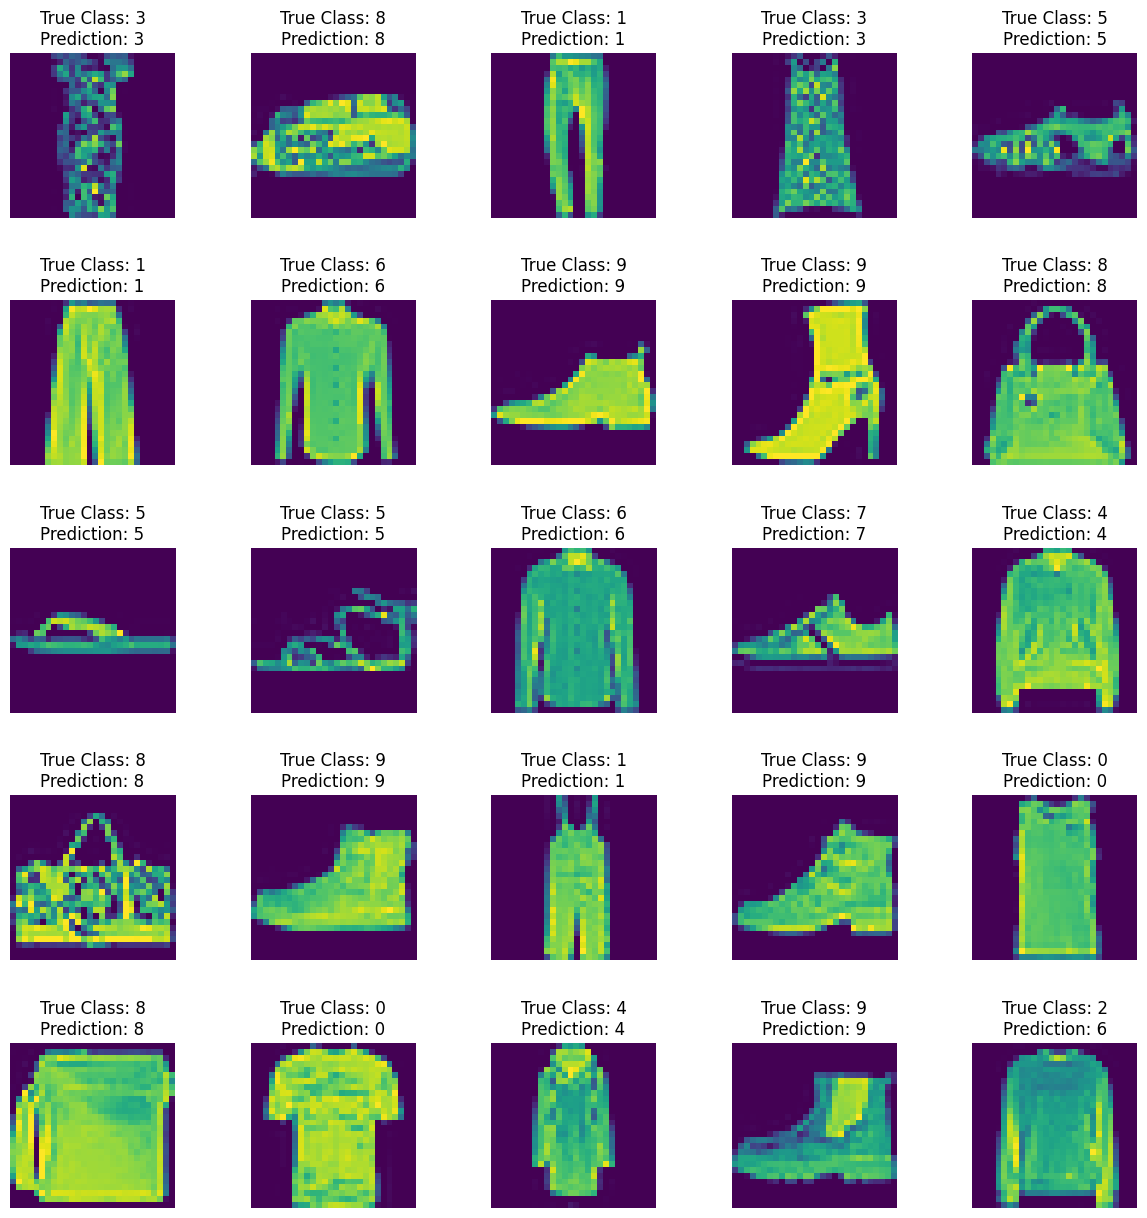

In [17]:
height = 5
width = 5

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(15,15))
axes = axes.ravel()
for i in range(0, height*width):
    index = np.random.randint(len(classes_x))
    axes[i].imshow(X_test[index].reshape((28,28)))
    axes[i].set_title(f"True Class: {int(y_test[index])}\nPrediction: {classes_x[index]}")
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.5)

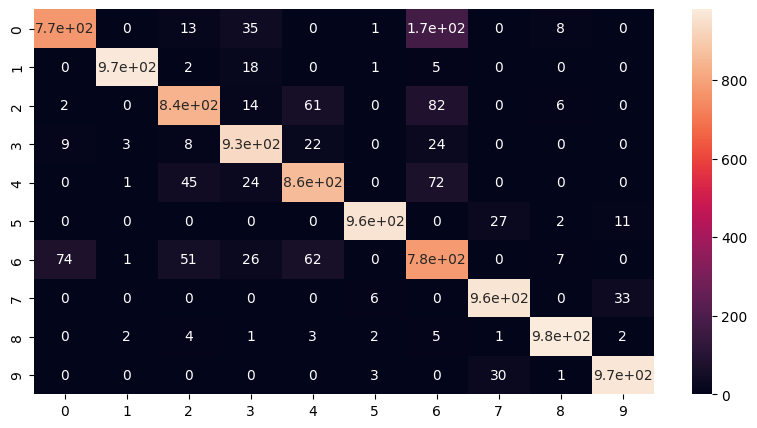

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, classes_x)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True)
plt.show()

In [19]:
from sklearn.metrics import classification_report

num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, classes_x, target_names=class_names)
print(cr)

              precision    recall  f1-score   support

     class 0       0.90      0.77      0.83      1000
     class 1       0.99      0.97      0.98      1000
     class 2       0.87      0.83      0.85      1000
     class 3       0.89      0.93      0.91      1000
     class 4       0.85      0.86      0.86      1000
     class 5       0.99      0.96      0.97      1000
     class 6       0.68      0.78      0.73      1000
     class 7       0.94      0.96      0.95      1000
     class 8       0.98      0.98      0.98      1000
     class 9       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

